## Apply Beta-sigma SNR estimates on the CRIRES Spectra

Using the berved spectra

Should compare weith berved masked but assume it will be small differences.



In [147]:
from astropy.io import fits
import os
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

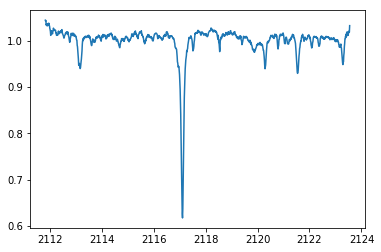

In [43]:
file = "/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr.fits"

data = fits.getdata(file)

plt.plot(data["wavelength"], data["flux"])

plt.show()

In [61]:
def betasigma_spectra(file, Nmax=5, j=1, arb=False, returnMAD=True):
    data = fits.getdata(file)
    xi, yi = data["wavelength"], data["flux"]

    mdiff = np.max(np.abs(np.diff(flux)))
    print("""Maximum absolute difference between consecutive
        values of flux: """, mdiff)

    nd = len(flux)
    print("Number of 'data points': ", nd)
    print()
    print("Very Rough std = {}".format(np.std(flux)))

    # Create class instance for equidistant sampling
    if arb:
        bsarb = pyasl.BSArbSamp()
    else:
        bseq = pyasl.BSEqSamp()
    
    # Specify jump parameter (j) for construction of beta sample
    j = j

    # Order of approximation to use
    Ns = range(Nmax+1)

    # Use to store noise estimates
    smads, dsmads = [], []

    # Loop over orders of approximation between 0 and 3
    for N in Ns:
        print("Order of approximation (N): ", N)

        # Get estimates of standard deviation based on robust (MAD-based) estimator
        if arb:
            smad, dsmad = bsarb.betaSigma(xi, yi, N, j, returnMAD=returnMAD)
            print("    Size of beta sample: ", len(bsarb.betaSample))
        else:
            smad, dsmad = bseq.betaSigma(yi, N, j, returnMAD=returnMAD)
            print("    Size of beta sample: ", len(bseq.betaSample))
        print("    Robust estimate of noise std: %6.5f +/- %6.5f" % (smad, dsmad))
        # Save result
        smads.append(smad)
        dsmads.append(dsmad)

    # Plot g(t) and the synthetic data
    plt.subplot(2,1,1)
    plt.title("Data (top) and noise estimates (bottom)")
    plt.plot(xi, yi, 'b.-', label="flux")
    #plt.errorbar(ti, yi, yerr=np.ones(nd)*istd, fmt='r+', label="$y_i$")
    plt.legend()
    plt.subplot(2,1,2)
    plt.title("N=0 is insufficient")
    plt.errorbar(Ns, smads, yerr=dsmads, fmt='k+', label="Noise estimates")
    #plt.plot([min(Ns)-0.5, max(Ns)+0.5], [np.std(flux)]*2, 'k--', label="Rough value")
    plt.legend()
    plt.xlabel("Order of approximation (N)")
    plt.ylabel("Noise STD")
    plt.tight_layout()
    plt.show()

HD30501-1-mixavg-tellcorr_1_bervcorr.fits
j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1023
    Robust estimate of noise std: 0.00234 +/- 0.00010
Order of approximation (N):  1
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00193 +/- 0.00010
Order of approximation (N):  2
    Size of beta sample:  1021
    Robust estimate of noise std: 0.00199 +/- 0.00011
Order of approximation (N):  3
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00203 +/- 0.00012
Order of approximation (N):  4
    Size of beta sample:  1019
    Robust estimate of noise std: 0.00208 +/- 0.00013
Order of approximation (N):  5
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00215 +/- 0.00014


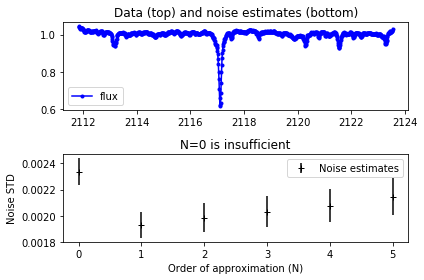

j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00306 +/- 0.00014
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00213 +/- 0.00011
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00189 +/- 0.00010
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00172 +/- 0.00010
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00168 +/- 0.00010
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00165 +/- 0.00011


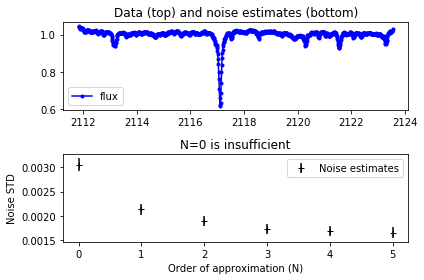

j=3
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00306 +/- 0.00014
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00213 +/- 0.00011
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00189 +/- 0.00010
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00172 +/- 0.00010
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00168 +/- 0.00010
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00165 +/- 0.00011


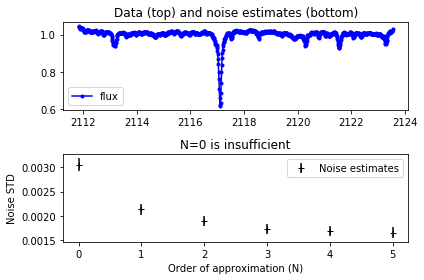

HD30501-1-mixavg-tellcorr_2_bervcorr.fits
j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1023
    Robust estimate of noise std: 0.00192 +/- 0.00009
Order of approximation (N):  1
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00186 +/- 0.00009
Order of approximation (N):  2
    Size of beta sample:  1021
    Robust estimate of noise std: 0.00187 +/- 0.00010
Order of approximation (N):  3
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00197 +/- 0.00012
Order of approximation (N):  4
    Size of beta sample:  1019
    Robust estimate of noise std: 0.00207 +/- 0.00013
Order of approximation (N):  5
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00216 +/- 0.00014


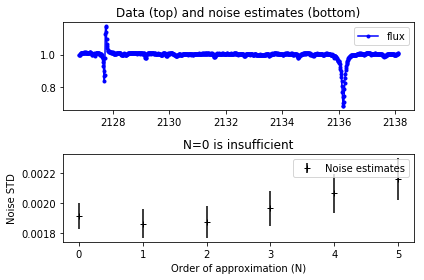

j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00172 +/- 0.00008
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00132 +/- 0.00007
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00119 +/- 0.00007
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00113 +/- 0.00007
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00110 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00113 +/- 0.00007


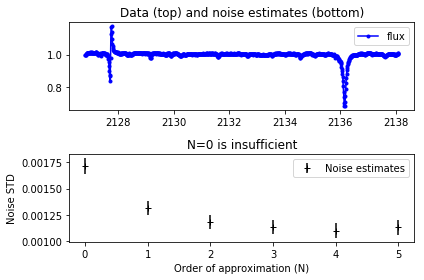

j=3
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00172 +/- 0.00008
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00132 +/- 0.00007
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00119 +/- 0.00007
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00113 +/- 0.00007
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00110 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00113 +/- 0.00007


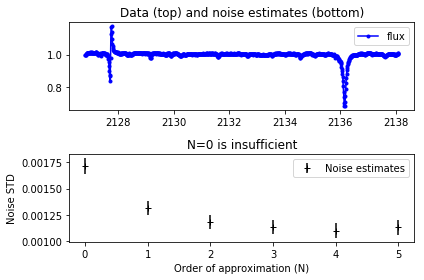

HD30501-1-mixavg-tellcorr_3_bervcorr.fits
j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1023
    Robust estimate of noise std: 0.00153 +/- 0.00007
Order of approximation (N):  1
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00112 +/- 0.00006
Order of approximation (N):  2
    Size of beta sample:  1021
    Robust estimate of noise std: 0.00104 +/- 0.00006
Order of approximation (N):  3
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00105 +/- 0.00006
Order of approximation (N):  4
    Size of beta sample:  1019
    Robust estimate of noise std: 0.00106 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00105 +/- 0.00007


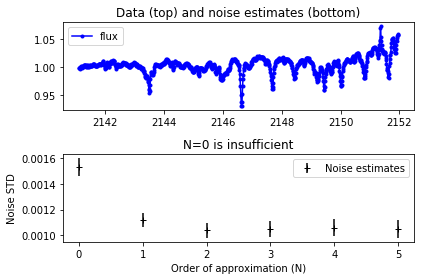

j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00234 +/- 0.00010
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00153 +/- 0.00008
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00135 +/- 0.00007
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00123 +/- 0.00007
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00119 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00115 +/- 0.00007


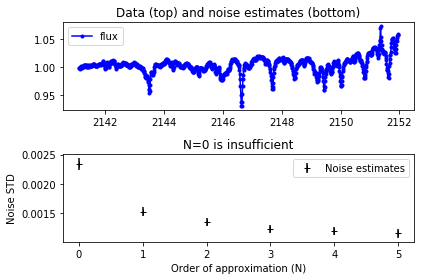

j=3
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00234 +/- 0.00010
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00153 +/- 0.00008
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00135 +/- 0.00007
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00123 +/- 0.00007
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00119 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00115 +/- 0.00007


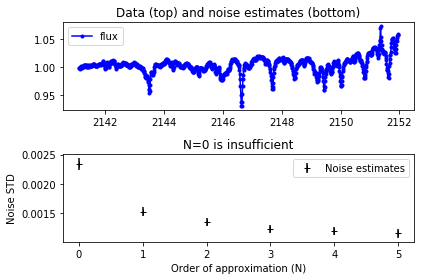

HD30501-1-mixavg-tellcorr_4_bervcorr.fits
j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1023
    Robust estimate of noise std: 0.00677 +/- 0.00030
Order of approximation (N):  1
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00604 +/- 0.00031
Order of approximation (N):  2
    Size of beta sample:  1021
    Robust estimate of noise std: 0.00665 +/- 0.00037
Order of approximation (N):  3
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00703 +/- 0.00041
Order of approximation (N):  4
    Size of beta sample:  1019
    Robust estimate of noise std: 0.00744 +/- 0.00046
Order of approximation (N):  5
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00784 +/- 0.00051


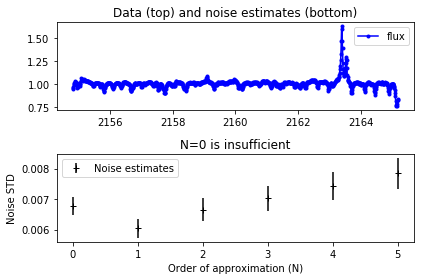

j=1
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00741 +/- 0.00033
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00434 +/- 0.00022
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00285 +/- 0.00016
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00262 +/- 0.00015
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00244 +/- 0.00015
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00241 +/- 0.00016


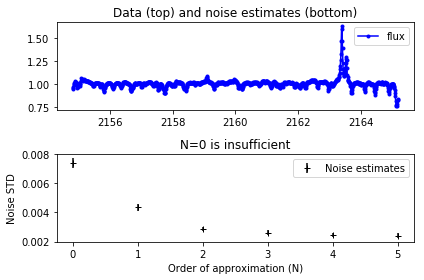

j=3
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00741 +/- 0.00033
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00434 +/- 0.00022
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00285 +/- 0.00016
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00262 +/- 0.00015
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00244 +/- 0.00015
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00241 +/- 0.00016


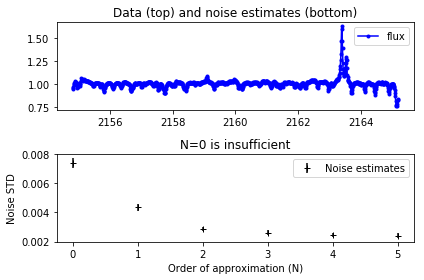

In [64]:
files = ["/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_2_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_3_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_4_bervcorr.fits"]


for file in files:
    print(os.path.split(file)[-1])
    print("j=1")
    betasigma_spectra(file)
    print("j=1")
    betasigma_spectra(file, j=2)
    print("j=3")
    betasigma_spectra(file, j=2)

HD30501-1-mixavg-tellcorr_3_bervcorr.fits
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00234 +/- 0.00010
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00153 +/- 0.00008
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00135 +/- 0.00007
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00123 +/- 0.00007
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00119 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00115 +/- 0.00007


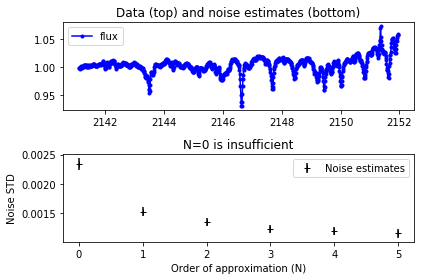

HD211847-1-mixavg-tellcorr_3_bervcorr.fits
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00245 +/- 0.00011
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00220 +/- 0.00011
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00211 +/- 0.00012
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00217 +/- 0.00013
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00212 +/- 0.00013
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00215 +/- 0.00014


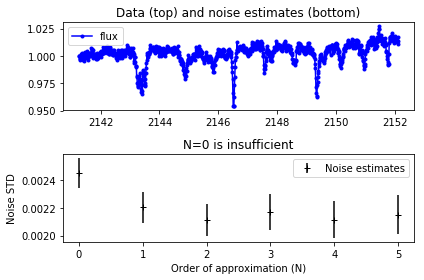

HD202206-1-mixavg-tellcorr_3_bervcorr.fits
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00278 +/- 0.00012
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00243 +/- 0.00012
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00224 +/- 0.00012
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00220 +/- 0.00013
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00220 +/- 0.00014
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00215 +/- 0.00014


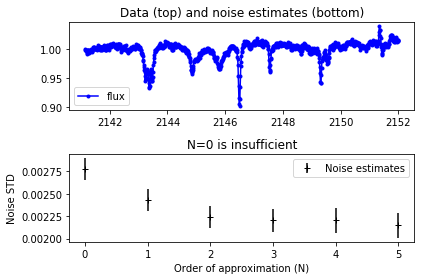

HD4747-1-mixavg-tellcorr_3_bervcorr.fits
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00189 +/- 0.00008
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00145 +/- 0.00007
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00129 +/- 0.00007
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00133 +/- 0.00008
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00127 +/- 0.00008
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00129 +/- 0.00008


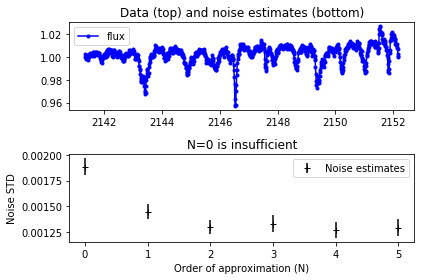

HD162020-1-mixavg-tellcorr_3_bervcorr.fits
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00371 +/- 0.00016
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00260 +/- 0.00013
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00223 +/- 0.00012
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00197 +/- 0.00012
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00189 +/- 0.00012
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00175 +/- 0.00011


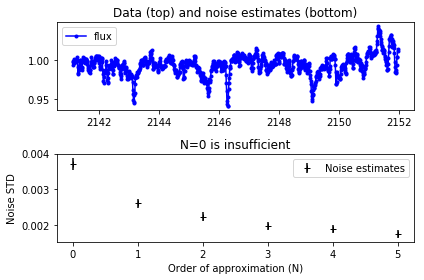

HD168443-1-mixavg-tellcorr_3_bervcorr.fits
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00213 +/- 0.00009
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00141 +/- 0.00007
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00126 +/- 0.00007
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00123 +/- 0.00007
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00117 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00110 +/- 0.00007


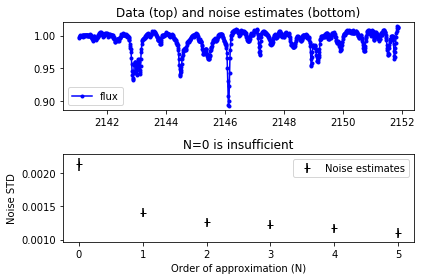

HD167665-1a-mixavg-tellcorr_3_bervcorr.fits
Maximum absolute difference between consecutive
        values of flux:  0.15977
Number of 'data points':  1024

Very Rough std = 0.05537807196378708
Order of approximation (N):  0
    Size of beta sample:  1022
    Robust estimate of noise std: 0.00129 +/- 0.00006
Order of approximation (N):  1
    Size of beta sample:  1020
    Robust estimate of noise std: 0.00112 +/- 0.00006
Order of approximation (N):  2
    Size of beta sample:  1018
    Robust estimate of noise std: 0.00108 +/- 0.00006
Order of approximation (N):  3
    Size of beta sample:  1016
    Robust estimate of noise std: 0.00104 +/- 0.00006
Order of approximation (N):  4
    Size of beta sample:  1014
    Robust estimate of noise std: 0.00106 +/- 0.00007
Order of approximation (N):  5
    Size of beta sample:  1012
    Robust estimate of noise std: 0.00106 +/- 0.00007


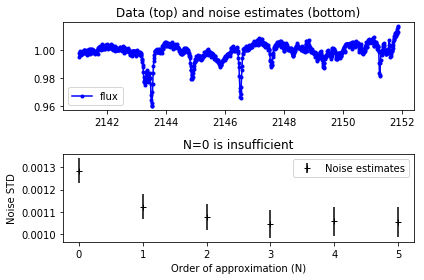

In [63]:
files = ["/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_3_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_3_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD202206-1-mixavg-tellcorr_3_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD4747-1-mixavg-tellcorr_3_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD162020-1-mixavg-tellcorr_3_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD168443-1-mixavg-tellcorr_3_bervcorr.fits",
         "/home/jneal/.handy_spectra/HD167665-1a-mixavg-tellcorr_3_bervcorr.fits"]


for file in files:
    print(os.path.split(file)[-1])
    betasigma_spectra(file, j=2)
    

In [65]:

These spectra seem to have SNR ~ 300-900 in the continuum from Beta simga estimates.

SyntaxError: invalid syntax (<ipython-input-65-ff1968e84732>, line 2)

In [85]:

def cross_check():
    pass

def Betasigma_check(y, N, j, **kwargs):
    "Checks adjacent orders for consistency"
    bseq = pyasl.BSEqSamp()
    smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
    smad1, dsmad1 = bseq.betaSigma(yi, N+1, j, **kwargs)
    print("    Robust estimate of noise std 0(N): %6.5f +/- %6.5f" % (smad, dsmad))
    print("    Robust estimate of noise std 0(N+1): %6.5f +/- %6.5f" % (smad1, dsmad1))
    if ( (smad1-dsmad1) < smad < (smad1+dsmad1) ) & ((smad-dsmad) < smad1 < (smad+dsmad) ):
        print("consistent")
    else:
        print(N, "and", N+1, "are not conisitent")
        
        
def Betasigma_j_check(y, N, j,**kwargs):
    "Checks adjacent orders for consistency"
    bseq = pyasl.BSEqSamp()
    smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
    smad1, dsmad1 = bseq.betaSigma(yi, N, j+1, **kwargs)
    print("    Robust estimate of noise std j={}: {:6.5f} +/- {:6.5f}".format(j, smad, dsmad))
    print("    Robust estimate of noise std j={}: {:6.5f} +/- {:6.5f}".format(j+1, smad1, dsmad1))
    if ( (smad1-dsmad1) < smad < (smad1+dsmad1) ) & ((smad-dsmad) < smad1 < (smad+dsmad) ):
        print("consistent")
    else:
        print(N, "and", N+1, "are not conisitent")

In [93]:
Betasigma_check(flux, 4, j=1, returnMAD=True)

    Robust estimate of noise std 0(N): 0.00744 +/- 0.00046
    Robust estimate of noise std 0(N+1): 0.00784 +/- 0.00051
consistent


In [99]:
Betasigma_j_check(flux, 4, j=3, returnMAD=True)

    Robust estimate of noise std j=3: 0.00965 +/- 0.00060
    Robust estimate of noise std j=4: 0.00985 +/- 0.00061
consistent


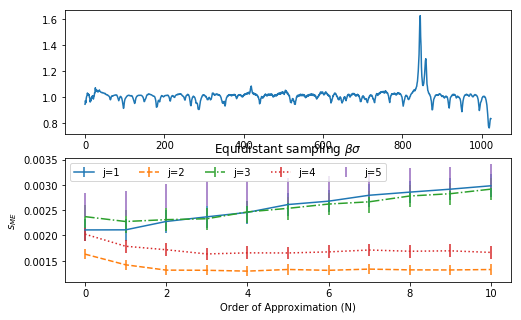

In [154]:
def betasigma_plot(flux, arb=False, **kwargs):
    import matplotlib
    # colors_array = list(matplotlib.colors.cnames.keys())
    lines_array = list(matplotlib.lines.lineStyles.keys())
    # markers_array = list(matplotlib.markers.MarkerStyle.markers)
    Ns = range(11)
    js = range(1,6)
    
    plt.figure(figsize=(8, 5))
    plt.subplot(211)
    plt.plot(flux)
    plt.subplot(212)
    for jj, j in enumerate(js):
        # Use to store noise estimates
        smads, dsmads = [], []
        for N in Ns:
            #print("Order of approximation (N): ", N)

            # Get estimates of standard deviation based on robust (MAD-based) estimator
            if arb:
                smad, dsmad = bsarb.betaSigma(xi, yi, N, j, returnMAD=returnMAD)
            else:
                smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
        # Save result
            smads.append(smad)
            dsmads.append(dsmad)
        plt.errorbar(Ns, smads, dsmad, label="j={}".format(j), linestyle=lines_array[jj])
        plt.xlabel("Order of Approximation (N)")
        plt.ylabel("$s_{ME}$")
        if arb:
            plt.title(r"Arbitray sampling $\beta\sigma$")
        else:
             plt.title(r"Equidistant sampling $\beta\sigma$")
    plt.legend(ncol=len(js))
    plt.show()
    

betasigma_plot(flux, returnMAD=True)

HD30501-1-mixavg-tellcorr_1_bervcorr_masked.fits


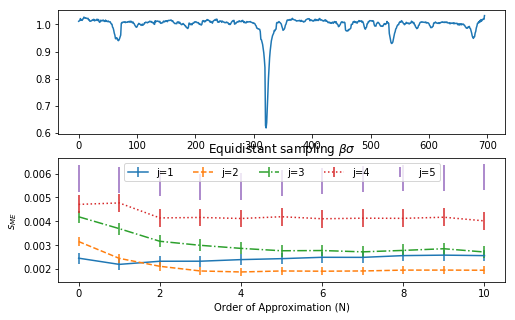

HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits


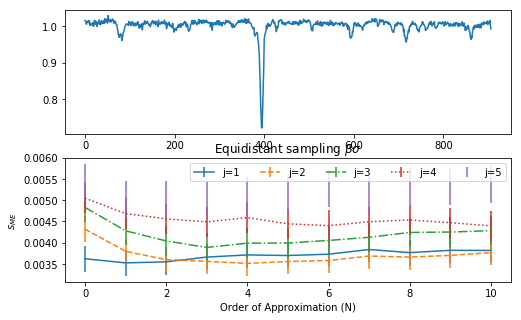

HD202206-1-mixavg-tellcorr_1_bervcorr_masked.fits


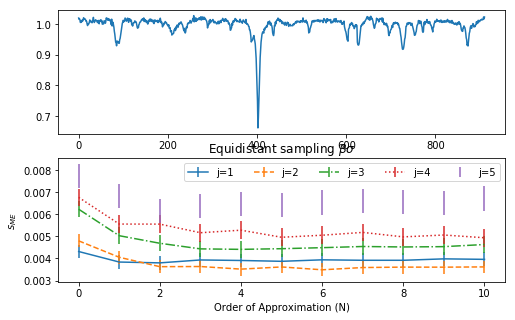

HD4747-1-mixavg-tellcorr_1_bervcorr_masked.fits


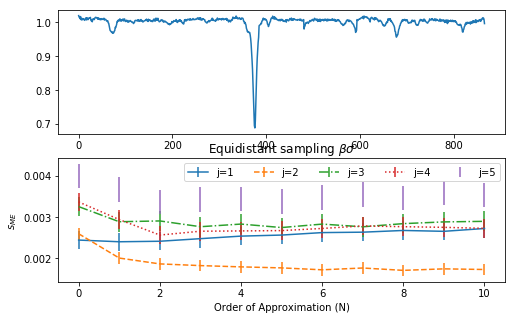

HD162020-1-mixavg-tellcorr_1_bervcorr_masked.fits


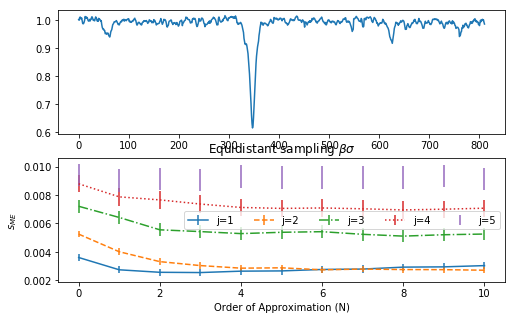

HD168443-1-mixavg-tellcorr_1_bervcorr_masked.fits


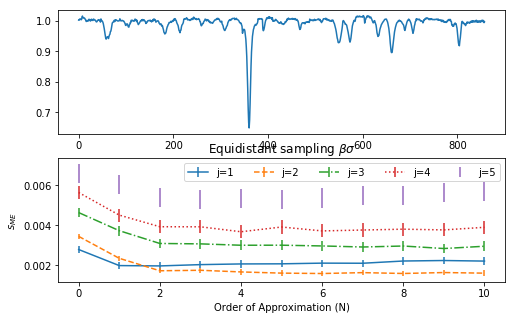

HD167665-1a-mixavg-tellcorr_1_bervcorr_masked.fits


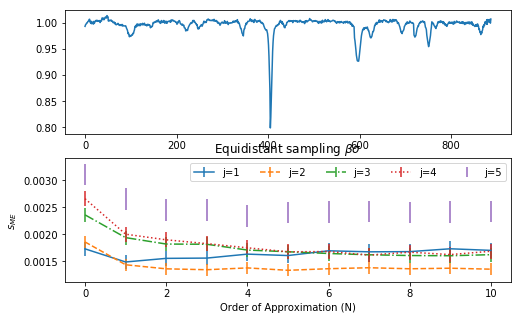

HD30501-1-mixavg-tellcorr_2_bervcorr_masked.fits


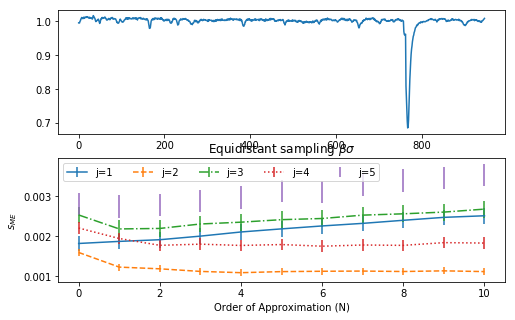

HD211847-1-mixavg-tellcorr_2_bervcorr_masked.fits


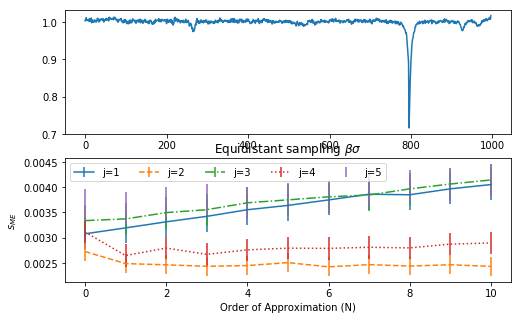

HD202206-1-mixavg-tellcorr_2_bervcorr_masked.fits


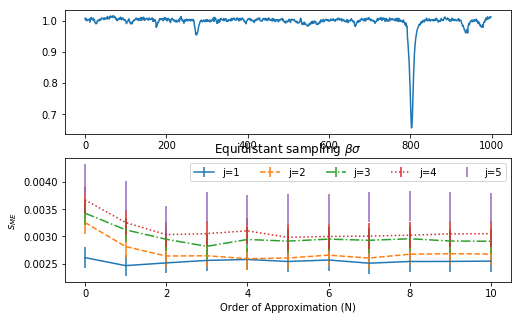

HD4747-1-mixavg-tellcorr_2_bervcorr_masked.fits


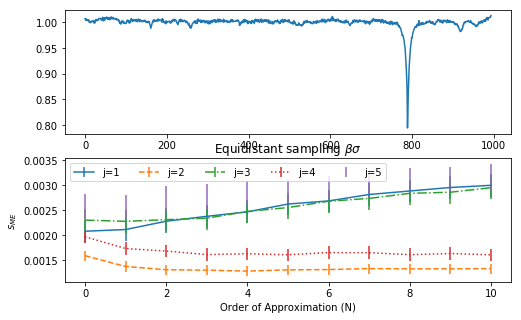

HD168443-1-mixavg-tellcorr_2_bervcorr_masked.fits


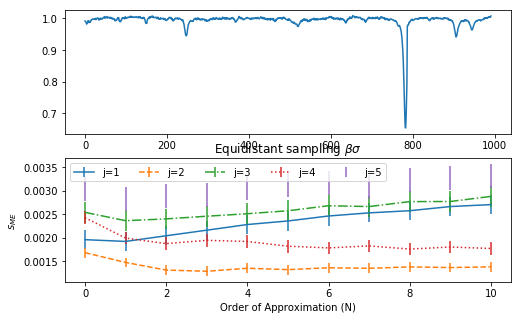

HD167665-1a-mixavg-tellcorr_2_bervcorr_masked.fits


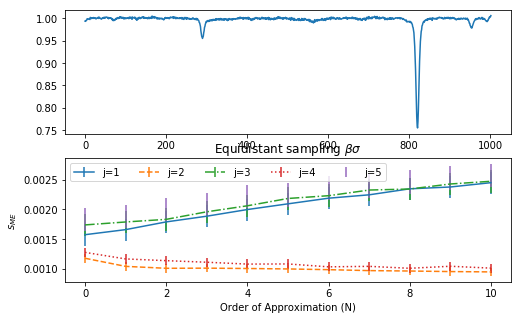

HD30501-1-mixavg-tellcorr_3_bervcorr_masked.fits


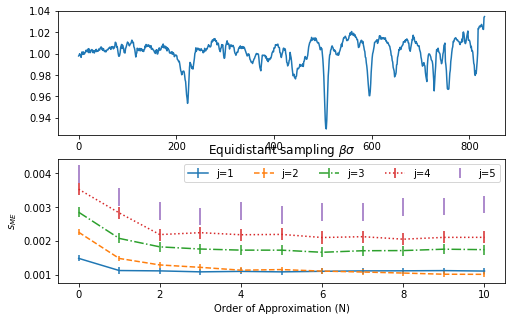

HD211847-1-mixavg-tellcorr_3_bervcorr_masked.fits


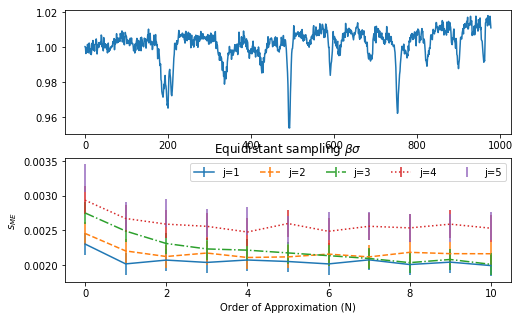

HD202206-1-mixavg-tellcorr_3_bervcorr_masked.fits


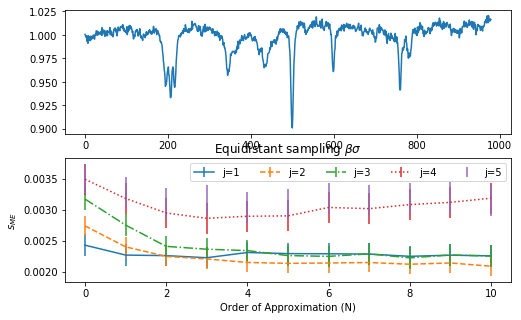

HD4747-1-mixavg-tellcorr_3_bervcorr_masked.fits


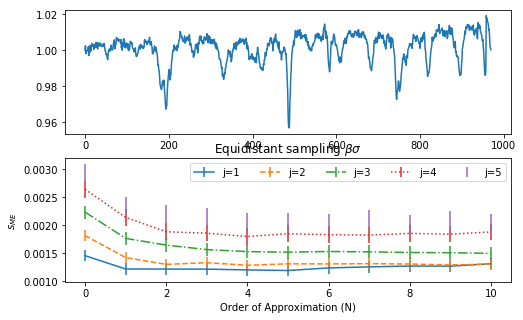

HD162020-1-mixavg-tellcorr_3_bervcorr_masked.fits


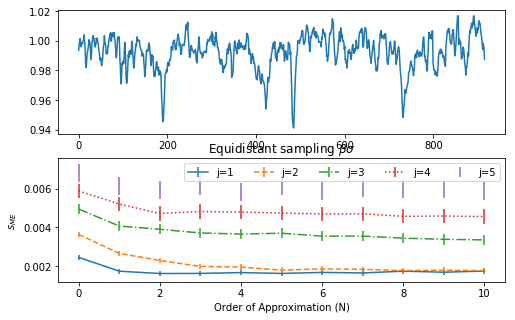

HD168443-1-mixavg-tellcorr_3_bervcorr_masked.fits


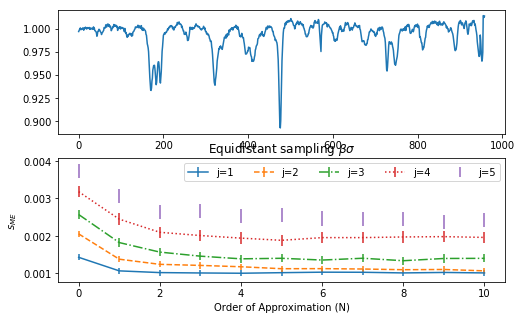

HD167665-1a-mixavg-tellcorr_3_bervcorr_masked.fits


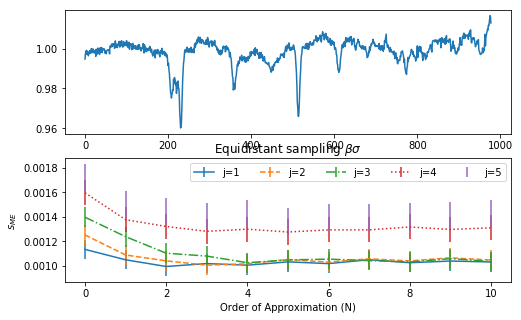

HD30501-1-mixavg-tellcorr_4_bervcorr_masked.fits


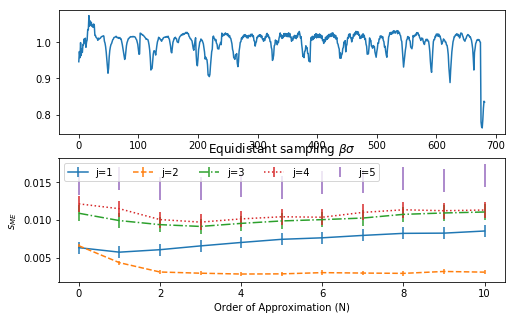

HD211847-1-mixavg-tellcorr_4_bervcorr_masked.fits


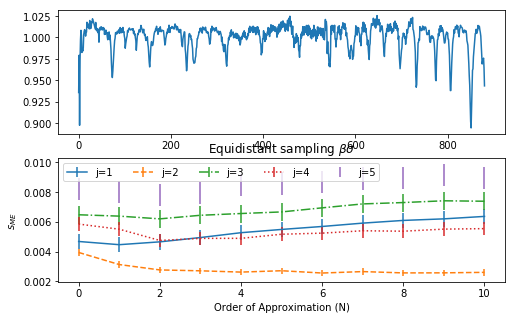

HD202206-1-mixavg-tellcorr_4_bervcorr_masked.fits


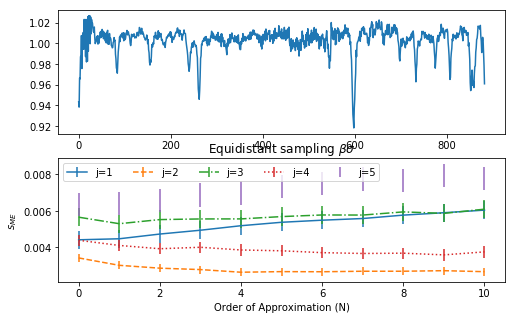

HD4747-1-mixavg-tellcorr_4_bervcorr_masked.fits


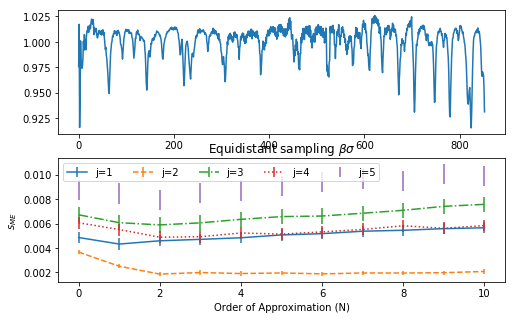

HD162020-1-mixavg-tellcorr_4_bervcorr_masked.fits


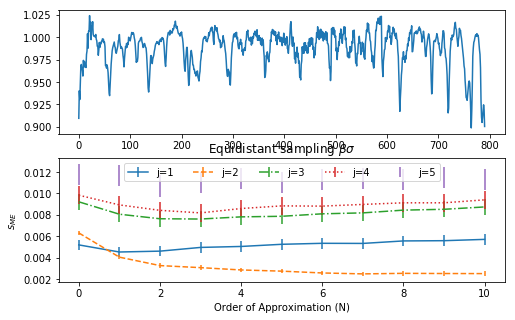

HD168443-1-mixavg-tellcorr_4_bervcorr_masked.fits


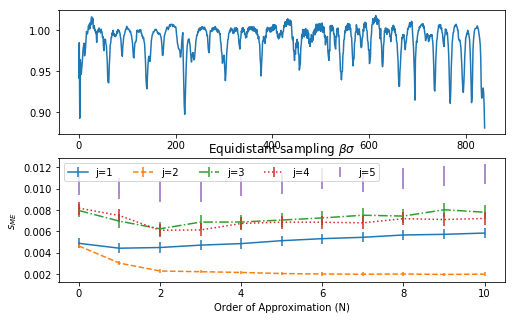

HD167665-1a-mixavg-tellcorr_4_bervcorr_masked.fits


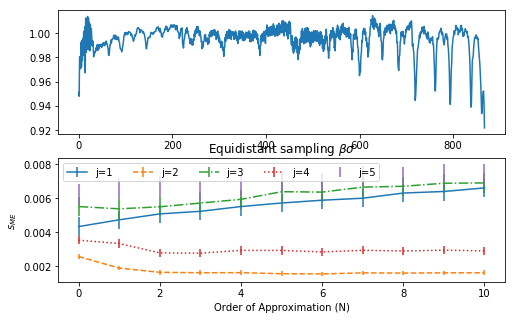

In [158]:
files = ["/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD202206-1-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD4747-1-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD162020-1-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD168443-1-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD167665-1a-mixavg-tellcorr_1_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_2_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_2_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD202206-1-mixavg-tellcorr_2_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD4747-1-mixavg-tellcorr_2_bervcorr_masked.fits",
         #"/home/jneal/.handy_spectra/HD162020-1-mixavg-tellcorr_2_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD168443-1-mixavg-tellcorr_2_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD167665-1a-mixavg-tellcorr_2_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_3_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_3_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD202206-1-mixavg-tellcorr_3_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD4747-1-mixavg-tellcorr_3_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD162020-1-mixavg-tellcorr_3_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD168443-1-mixavg-tellcorr_3_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD167665-1a-mixavg-tellcorr_3_bervcorr_masked.fits",
        "/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_4_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_4_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD202206-1-mixavg-tellcorr_4_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD4747-1-mixavg-tellcorr_4_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD162020-1-mixavg-tellcorr_4_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD168443-1-mixavg-tellcorr_4_bervcorr_masked.fits",
         "/home/jneal/.handy_spectra/HD167665-1a-mixavg-tellcorr_4_bervcorr_masked.fits"]


for file in files:
    print(os.path.split(file)[-1])
    data = fits.getdata(file)
    xi, yi = data["wavelength"], data["flux"]
    betasigma_plot(yi, arb=False, returnMAD=True)